In [2]:
!pip uninstall -y imagecodecs
!pip install imagecodecs-lite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 54.9 MB/s eta 0:00:00:00:0100:01


In [5]:
!pip install tifffile pandas scikit-image

In [3]:
import imagecodecs
print(imagecodecs.__version__)


2026.1.14


In [5]:
import tifffile as tiff

vol = tiff.imread(
    '/kaggle/input/vesuvius-challenge-surface-detection/train_images/1013184726.tif'
)

print(vol.shape, vol.dtype)


(320, 320, 320) uint8


In [7]:
import os
import numpy as np
import pandas as pd

DATA_DIR = "/kaggle/input/vesuvius-challenge-surface-detection/train_images"


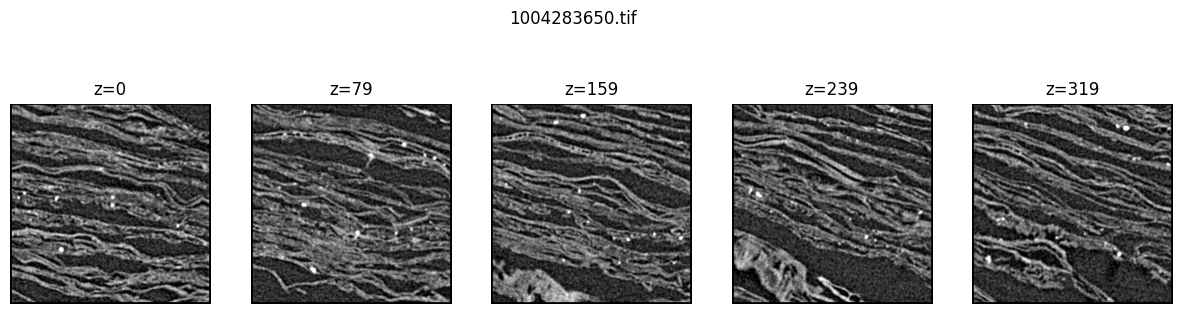

In [8]:
import matplotlib.pyplot as plt

def show_slices(volume, title="", n=5):
    z = volume.shape[0]
    idxs = np.linspace(0, z-1, n, dtype=int)

    fig, axes = plt.subplots(1, n, figsize=(15, 4))
    for ax, i in zip(axes, idxs):
        ax.imshow(volume[i], cmap="gray")
        ax.set_title(f"z={i}")
        ax.axis("off")
    fig.suptitle(title)
    plt.show()

vol = tiff.imread(os.path.join(DATA_DIR, files[0]))
show_slices(vol, files[0])


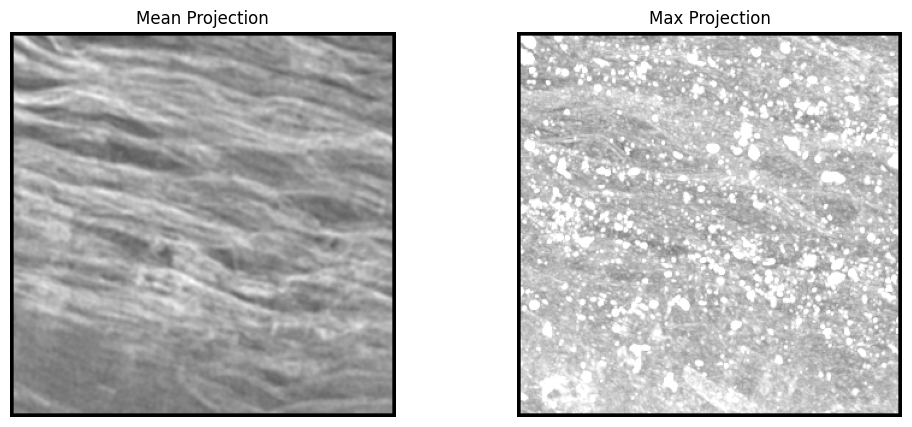

In [9]:
mean_proj = vol.mean(axis=0)
max_proj = vol.max(axis=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(mean_proj, cmap="gray")
ax[0].set_title("Mean Projection")
ax[1].imshow(max_proj, cmap="gray")
ax[1].set_title("Max Projection")

for a in ax:
    a.axis("off")

plt.show()


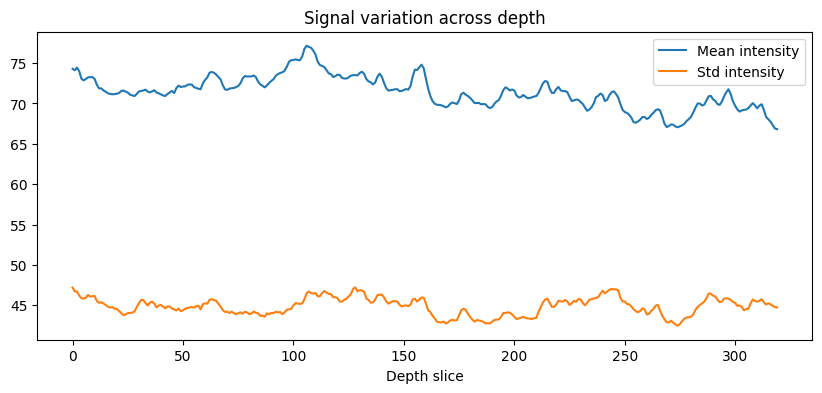

In [10]:
depth_means = vol.mean(axis=(1,2))
depth_stds = vol.std(axis=(1,2))

plt.figure(figsize=(10,4))
plt.plot(depth_means, label="Mean intensity")
plt.plot(depth_stds, label="Std intensity")
plt.xlabel("Depth slice")
plt.legend()
plt.title("Signal variation across depth")
plt.show()


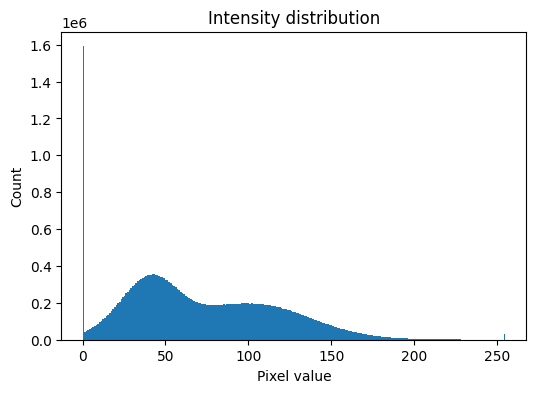

In [11]:
plt.figure(figsize=(6,4))
plt.hist(vol.flatten(), bins=256)
plt.title("Intensity distribution")
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()


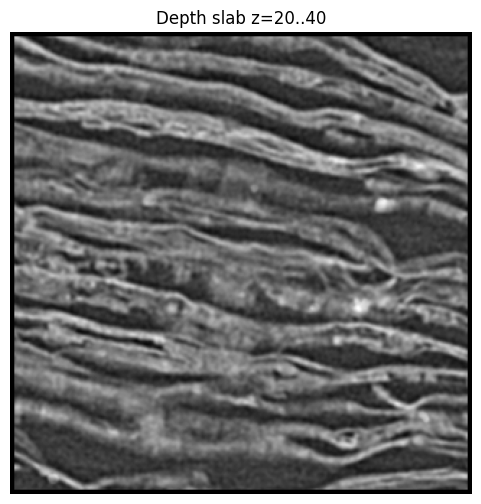

In [12]:
def depth_slab(volume, z0, z1):
    return volume[z0:z1].mean(axis=0)

slab = depth_slab(vol, 20, 40)

plt.figure(figsize=(6,6))
plt.imshow(slab, cmap="gray")
plt.title("Depth slab z=20..40")
plt.axis("off")
plt.show()


In [ ]:
!pip install napari[all] tifffile numpy
!pip install scikit-image


In [ ]:
import napari
from tifffile import imread

data = imread('./data/1407735.tif')
viewer = napari.Viewer()
viewer.add_image(data, name='3D Volume')
viewer.dims.ndisplay = 3
napari.run()